# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

C:\Users\idogr\AppData\Local\Temp\ipykernel_33716\867683384.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Configuration

In [2]:
ENV_NAME = 'KhazadDum-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'kd'
TASKS = ('noise',)
task_dim = len(TASKS)
METHODS = ('varibad', 'cembad', 'cvrbad')
SEEDS = list(range(30))
ALPHA = 0.01

CEM-related configuration:

In [3]:
TRANSFORMATION = lambda x: x
YLIM = None
SMOOTH = 10

## Validation results

In [5]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA)
dd

kd_varibad_0__17_01_06_29_42
kd_varibad_1__17_01_06_29_45
kd_varibad_2__17_01_06_29_46
kd_varibad_3__17_01_06_29_46
kd_varibad_4__17_01_06_29_47
kd_varibad_5__17_01_06_29_48
kd_varibad_6__17_01_06_29_48
kd_varibad_7__17_01_06_29_48
kd_varibad_8__17_01_06_29_49
kd_varibad_9__17_01_06_29_50
kd_varibad_10__17_01_06_29_50
kd_varibad_11__17_01_06_29_51
kd_varibad_12__17_01_06_29_52
kd_varibad_13__17_01_06_29_53
kd_varibad_14__17_01_06_29_54
kd_varibad_15__17_01_06_29_55
kd_varibad_16__17_01_06_30_01
kd_varibad_17__17_01_06_29_56
kd_varibad_18__17_01_06_29_57
kd_varibad_19__17_01_06_29_57
kd_varibad_20__17_01_06_29_59
kd_varibad_21__17_01_06_30_00
kd_varibad_22__17_01_06_30_10
kd_varibad_23__17_01_06_30_11
kd_varibad_24__17_01_06_30_12
kd_varibad_25__17_01_06_30_14
kd_varibad_26__17_01_06_30_15
kd_varibad_27__17_01_06_30_18
kd_varibad_28__17_01_06_30_25
kd_varibad_29__17_01_06_34_11
kd_cembad_0__17_01_06_34_20
kd_cembad_1__17_01_06_34_22
kd_cembad_2__17_01_06_34_22
kd_cembad_3__17_01_06_34_2

,iter,task_id,ep,ret,info,task0,method,seed
0,-1,0,0,-0.997684,stay_fall,0.045523,varibad,0
1,-1,0,1,-0.998120,stay_fall,0.045523,varibad,0
2,-1,0,2,0.044278,short_done,0.045523,varibad,0
3,-1,0,3,0.083433,short_done,0.045523,varibad,0
4,-1,1,0,-0.995571,stay_fall,0.086759,varibad,0
...,...,...,...,...,...,...,...,...
3686395,1949,254,3,-0.271570,long_done,0.058051,cvrbad,29
3686396,1949,255,0,-0.284974,long_done,0.196344,cvrbad,29
3686397,1949,255,1,-0.258777,long_done,0.196344,cvrbad,29
3686398,1949,255,2,-0.277752,long_done,0.196344,cvrbad,29


CPU times: total: 172 ms
Wall time: 228 ms


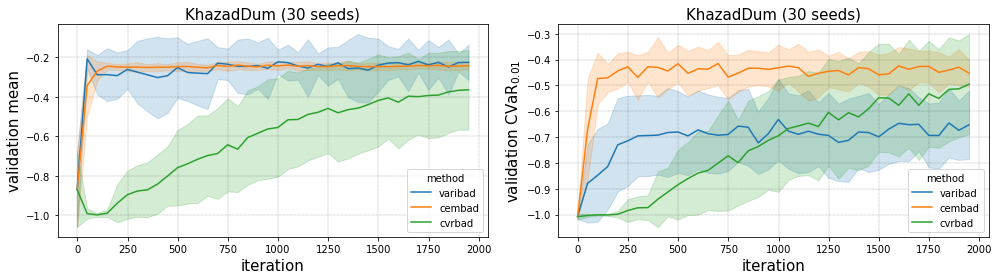

In [6]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

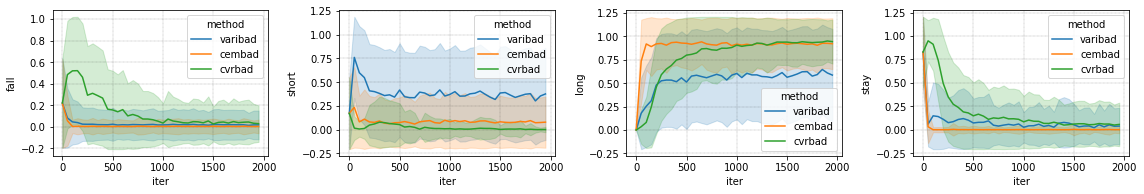

In [7]:
keys = ('fall', 'short', 'long', 'stay')
n = len(keys)
axs = utils.Axes(n, 4, axsize=(4,2.8), fontsize=15)
a = 0

for k in keys:
    dd[k] = [k in p for p in dd['info']]
    sns.lineplot(data=dd, x='iter', y=k, hue='method', ci='sd', ax=axs[a])
    a += 1
plt.tight_layout();

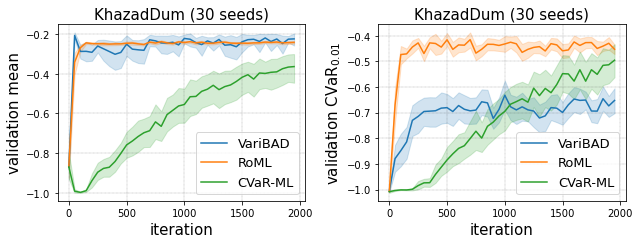

In [8]:
nm_map = dict(varibad='VariBAD', cembad='RoML', cvrbad='CVaR-ML')

dm = ddm[ddm.method.isin(nm_map.keys())].copy()
dc = ddc[ddc.method.isin(nm_map.keys())].copy()
dm['method'] = [nm_map[m] for m in dm.method]
dc['method'] = [nm_map[m] for m in dc.method]

axs = analysis.show_validation_results_over_seeds(dm, dc, ALPHA, TITLE, ci=95, axsize=(4.5,3.5))
axs[0].legend(fontsize=13)
axs[1].legend(fontsize=13)
plt.savefig(f'outputs/kd_valid', bbox_inches='tight', dpi=300);

## Test results

In [9]:
model = 'final'
nm_map = dict(varibad='VariBAD', cembad='RoML', cvrbad='CVaR-ML')
save = 'kd_f'
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, list(nm_map.keys()), SEEDS, ALPHA, model, nm_map=nm_map)

Test tasks: 3008


Average return for tasks with various ranges of noise in KhazadDum: VariBAD has a large drop under high noise, whereas RoML is robust to the task.
Errors correspond to 0.95 confidence intervals over 30 seeds.

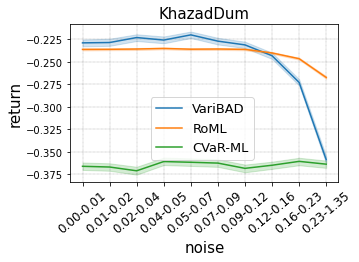

In [10]:
axs = utils.Axes(1,1, fontsize=15)
tit = TITLE  # f'{TITLE}\n(Test tasks, {len(pd.unique(rra.seed))} seeds)'

utils.compare_quantiles(rra, f'task0', 'ret', 'method', mean=None, mean_digits=2,
                        xbins=11, lab_rotation=40, axs=axs, a0=0)
axs.labs(0, TASKS[0], 'return', tit);
plt.legend(loc=(0.3,0.14), fontsize=13);
plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight', dpi=300);

Mean and CVaR returns over 1000 test tasks in KhazadDum.
Errors correspond to 0.95 confidence intervals over 30 seeds.

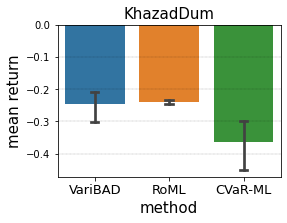

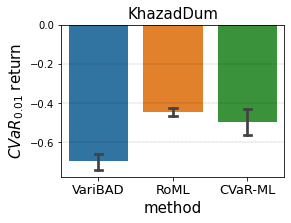

In [11]:
axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrm, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', 'mean return', TITLE)
plt.savefig(f'outputs/{save}_mean', bbox_inches='tight', dpi=300);

axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrc, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', f'$CVaR_{{{ALPHA}}}$ return', TITLE)
plt.savefig(f'outputs/{save}_cvar', bbox_inches='tight', dpi=300);

## CEM analysis

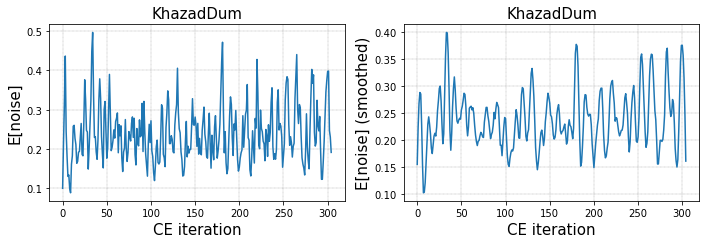

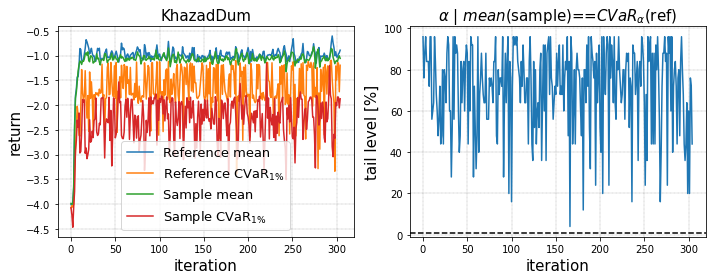

In [13]:
ce, c1, c2, axs, axs2 = analysis.cem_analysis(
    ENV_NAME, task_dim, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=1)

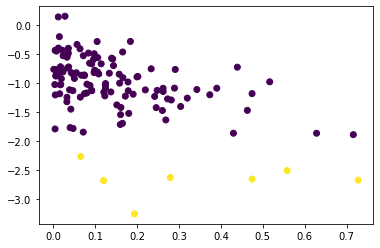

In [15]:
cc = c2[c2.batch==10]
plt.scatter(cc['sample'].values, cc.score.values, c=cc['selected'].values);